In [1]:
import tensorflow as tf



# List available GPUs
gpus = tf.config.experimental.list_physical_devices('GPU') #it will show list of all gpu available in the device

# Iterate through each GPU and set memory growth
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True) #this commmand helps gpu to expand memory, rather than pre-allocating the memonry input

In [2]:
#keras is heigh level neural network api, provide easy to use interface for deep leaarning model

from tensorflow import keras 
from keras import models, layers

# models--> it contains functions and classes for++++++++++ create/manage deep learning models
# layers--> contains layers to build neural network


In [3]:

import matplotlib.pyplot as plt #plotting libraray of python, used for plotting graphs
import cv2 #python open cv, computer vision library used for capturing real-time images
import numpy as np #for multi-dimensional arrays, random number generation

In [4]:
#avoid oom errors by setting GPU memory COnsumption Growth
gpus= tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
Image_Size=320
batchSize=32
Epochs=50

In [6]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    'govt-docs', #directory where the data is stored
    shuffle=True, #to shuffle the dataset, when the value is set to true
    image_size=(Image_Size, Image_Size), #size to which  the image to be resized
    color_mode='rgb',
    batch_size=batchSize,

)

#This dataset can then be used for training a machine learning model, typically a convolutional neural network (CNN), for tasks such as image classification or object detection.

Found 1320 files belonging to 2 classes.


In [7]:
#this for checking th classes found
class_names= dataset.class_names
class_names

['aadhar_card', 'pan_card']

In [8]:
len(dataset)

42

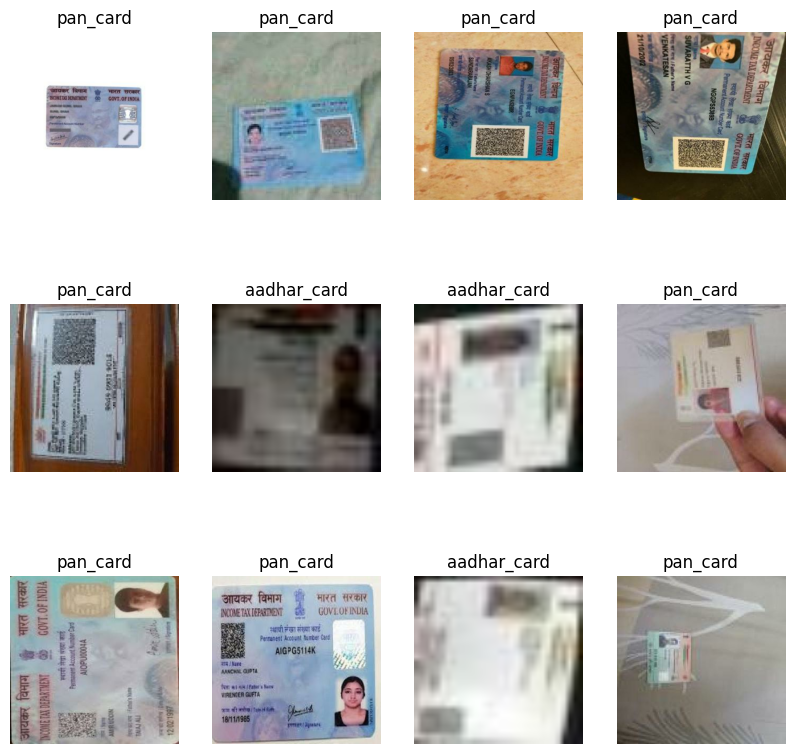

In [9]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):

        plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

    #print(image_batch[0].shape)
    

In [10]:
#spliting dataset

In [11]:
len(dataset)

42

## we aim to set:
    80%--> training 
    20%--> 10%validation, 10%test

### ** test dataset is require to check accuracy

In [12]:
#function for splitting dataset

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size=len(ds)

    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)

    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)

    train_ds= ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds= ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [13]:
train_ds, val_ds, test_ds= get_dataset_partitions_tf(dataset)

In [14]:
len(test_ds)

5

In [15]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental.preprocessing import Resizing, Rescaling

resize_and_rescale = Sequential([
    Resizing(320, 320),
    Rescaling(1.0/320)
])


In [17]:
def apply_augmentation(image):
    # Define your augmentation techniques here
    # For example:
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.rot90(image, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
    
    return image

In [30]:
model = models.Sequential([
    layers.Lambda(lambda img: apply_augmentation(img), input_shape=input_shape + (3,)),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(Image_Size, Image_Size)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 320, 320, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 318, 318, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 159, 159, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 157, 157, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 78, 78, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 76, 76, 64)       

In [34]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [38]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Enable GPU memory growth
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU memory growth enabled")
    except RuntimeError as e:
        print(e)

GPU memory growth enabled


In [40]:
history=model.fit(
    train_ds,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50


ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/sequential_2/max_pooling2d_6/MaxPool/MaxPoolGrad' defined at (most recent call last):
    File "c:\Users\Piyush\.conda\envs\py120\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Piyush\.conda\envs\py120\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\Piyush\.conda\envs\py120\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "c:\Users\Piyush\.conda\envs\py120\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "c:\Users\Piyush\.conda\envs\py120\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "c:\Users\Piyush\.conda\envs\py120\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Piyush\.conda\envs\py120\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\Piyush\.conda\envs\py120\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "c:\Users\Piyush\.conda\envs\py120\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\Piyush\.conda\envs\py120\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "c:\Users\Piyush\.conda\envs\py120\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "c:\Users\Piyush\.conda\envs\py120\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "c:\Users\Piyush\.conda\envs\py120\lib\site-packages\ipykernel\ipkernel.py", line 359, in execute_request
      await super().execute_request(stream, ident, parent)
    File "c:\Users\Piyush\.conda\envs\py120\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "c:\Users\Piyush\.conda\envs\py120\lib\site-packages\ipykernel\ipkernel.py", line 446, in do_execute
      res = shell.run_cell(
    File "c:\Users\Piyush\.conda\envs\py120\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\Piyush\.conda\envs\py120\lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell
      result = self._run_cell(
    File "c:\Users\Piyush\.conda\envs\py120\lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell
      result = runner(coro)
    File "c:\Users\Piyush\.conda\envs\py120\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\Piyush\.conda\envs\py120\lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\Piyush\.conda\envs\py120\lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\Piyush\.conda\envs\py120\lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Piyush\AppData\Local\Temp\ipykernel_21824\1718881013.py", line 1, in <module>
      history=model.fit(
    File "c:\Users\Piyush\.conda\envs\py120\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Piyush\.conda\envs\py120\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\Piyush\.conda\envs\py120\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\Piyush\.conda\envs\py120\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Piyush\.conda\envs\py120\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\Piyush\.conda\envs\py120\lib\site-packages\keras\engine\training.py", line 997, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "c:\Users\Piyush\.conda\envs\py120\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 576, in minimize
      grads_and_vars = self._compute_gradients(
    File "c:\Users\Piyush\.conda\envs\py120\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 634, in _compute_gradients
      grads_and_vars = self._get_gradients(
    File "c:\Users\Piyush\.conda\envs\py120\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 510, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/sequential_2/max_pooling2d_6/MaxPool/MaxPoolGrad'
OOM when allocating tensor with shape[32,318,318,32] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/sequential_2/max_pooling2d_6/MaxPool/MaxPoolGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_3245]

In [ ]:
model.evaluate(test_ds)

6/6 [==============================] - 1s 89ms/step - loss: 0.0115 - accuracy: 0.9948


[0.01152078527957201, 0.9947916865348816]

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 39}

In [ ]:
len(history.history['accuracy'])

50

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'training and validation accuracy')

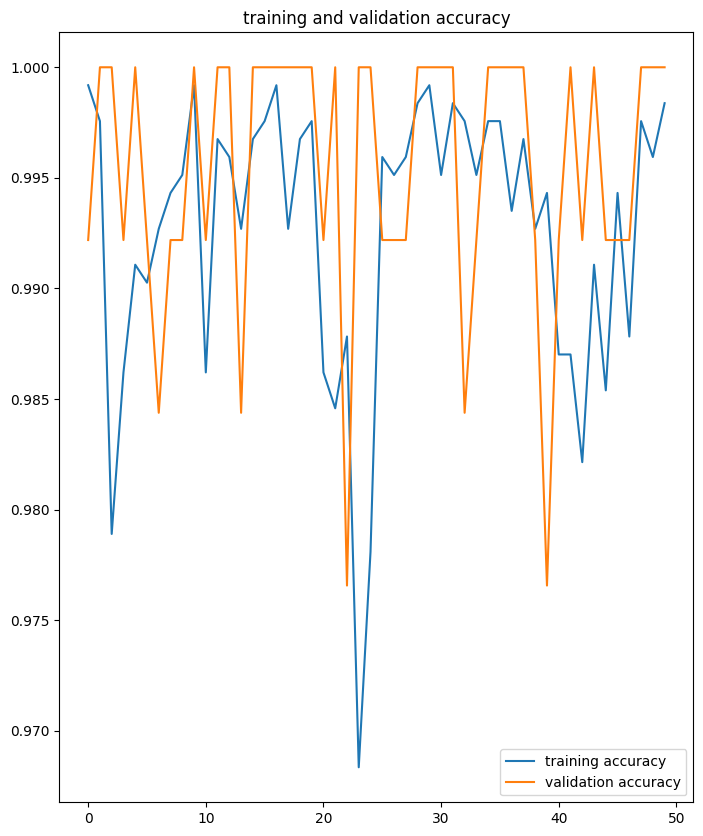

In [ ]:
plt.figure(figsize=(18, 10))
plt.subplot(1, 2, 1)
plt.plot(range(Epochs), acc, label='training accuracy')
plt.plot(range( Epochs), val_acc, label='validation accuracy')
plt.legend(loc='lower right')
plt.title('training and validation accuracy')



first image to be predicted
actual label:  aadhar_card
1/1 [==============================] - 0s 103ms/step
predicted label:  aadhar_card


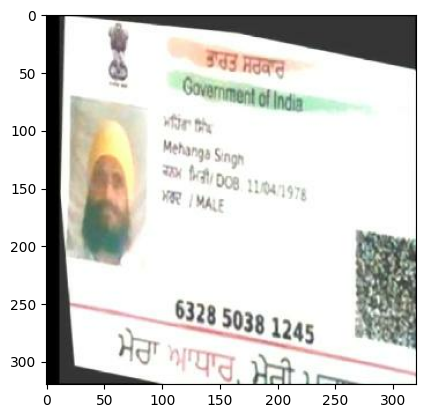

In [ ]:
import numpy as np
for images_batch, lables_batch in test_ds.take(1):
    
    first_image= images_batch[0].numpy().astype('uint8')
    first_label=lables_batch[0]

    print("first image to be predicted")
    plt.imshow(first_image)
    print("actual label: ", class_names[first_label])

    batch_prediction= model.predict(images_batch)
    print("predicted label: ", class_names[np.argmax(batch_prediction[0])])


In [ ]:
def predict(model, img):
    img_array= tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array= tf.expand_dims(img_array, 0)

    predictions= model.predict(img_array)

    predicted_class= class_names[np.argmax(predictions[0])]
    confidence= round(100* (np.max(predictions[0])), 2)
    return predicted_class,confidence

1/1 [==============================] - 0s 41ms/step


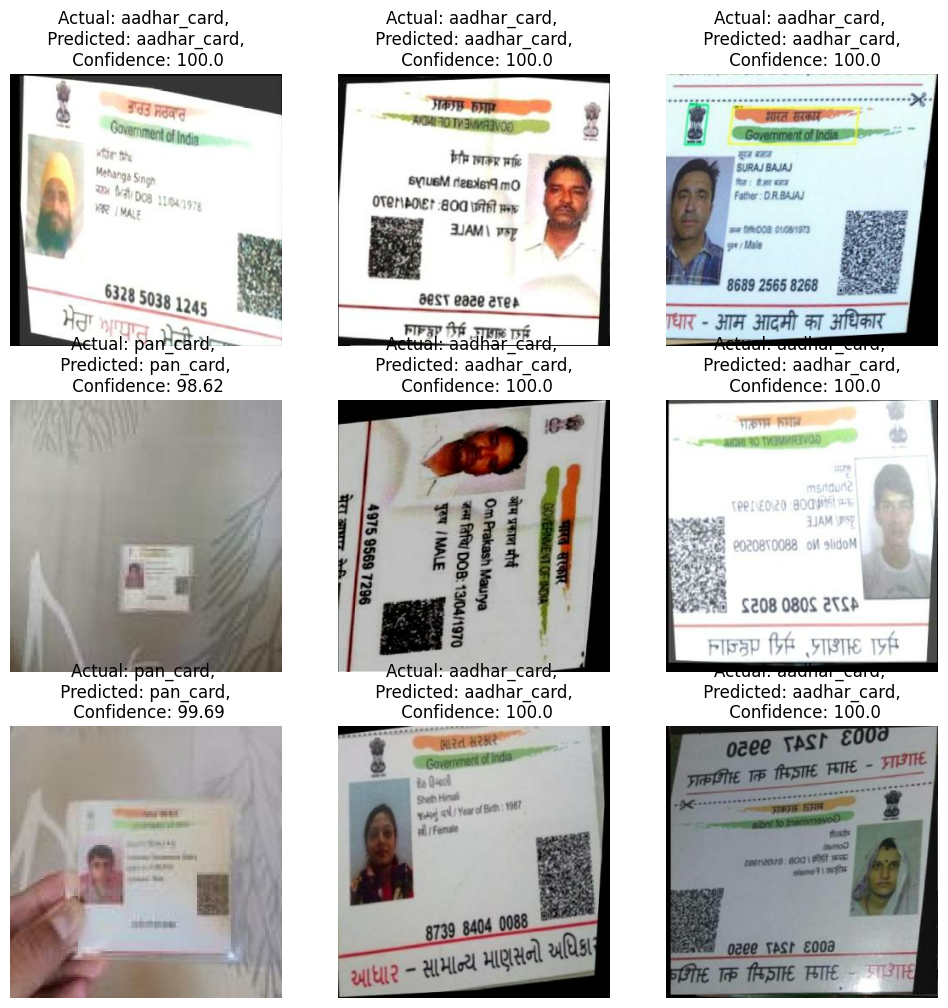

In [ ]:
plt.figure(figsize=(12, 12))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence=predict(model, images[i].numpy())
        actual_class=class_names[labels[i]]

        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}, \n Confidence: {confidence}")
        plt.axis('off')
        



In [ ]:
model_version=1
model.save(f"./models/{model_version}")


INFO:tensorflow:Assets written to: ./models/1\assets


INFO:tensorflow:Assets written to: ./models/1\assets
